In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('confirmed.csv')
df.head()

,Date notified of potential case,Sex,Age group,DHB,Overseas travel,Last country before return,Flight number,Flight departure date,Arrival date
0,07/05/2020,Female,20 to 29,Waitematā,No,NaN,NaN,NaN,NaN
1,06/05/2020,Male,5 to 9,Waikato,No,NaN,NaN,NaN,NaN
2,05/05/2020,Female,10 to 14,Waitematā,No,NaN,NaN,NaN,NaN
3,01/05/2020,Male,60 to 69,Auckland,No,NaN,NaN,NaN,NaN
4,01/05/2020,Female,20 to 29,Canterbury,No,NaN,NaN,NaN,NaN


In [25]:
df.dtypes

Date notified of potential case    object
Sex                                object
Age group                          object
DHB                                object
Overseas travel                    object
Last country before return         object
Flight number                      object
Flight departure date              object
Arrival date                       object
dtype: object

In [30]:
df['Date notified of potential case'] =pd.to_datetime(df['Date notified of potential case'])

In [31]:
df.dtypes


Date notified of potential case    datetime64[ns]
Sex                                        object
Age group                                  object
DHB                                        object
Overseas travel                            object
Last country before return                 object
Flight number                              object
Flight departure date                      object
Arrival date                               object
date                               datetime64[ns]
dtype: object

In [34]:
df


,Date notified of potential case,Sex,Age group,DHB,Overseas travel,Last country before return,Flight number,Flight departure date,Arrival date,date
0,2020-07-05,Female,20 to 29,Waitematā,No,NaN,NaN,NaN,NaN,2020-07-05
1,2020-06-05,Male,5 to 9,Waikato,No,NaN,NaN,NaN,NaN,2020-06-05
2,2020-05-05,Female,10 to 14,Waitematā,No,NaN,NaN,NaN,NaN,2020-05-05
3,2020-01-05,Male,60 to 69,Auckland,No,NaN,NaN,NaN,NaN,2020-01-05
4,2020-01-05,Female,20 to 29,Canterbury,No,NaN,NaN,NaN,NaN,2020-01-05
...,...,...,...,...,...,...,...,...,...,...
1137,2020-06-03,Female,40 to 49,Counties Manukau,No,NaN,NaN,NaN,NaN,2020-06-03
1138,2020-04-03,Male,40 to 49,Counties Manukau,No,NaN,NaN,NaN,NaN,2020-04-03
1139,2020-04-03,Male,40 to 49,Waitematā,Yes,Singapore,NZ283,25/02/2020,26/02/2020,2020-04-03
1140,2020-02-03,Female,30 to 39,Waitematā,Yes,Singapore,NZ283,25/02/2020,26/02/2020,2020-02-03


In [42]:
df.drop(['Date notified of potential case', 'Sex', 'Age group', 'Overseas travel', 'Last country before return', 'Flight number', 'Flight departure date', 'Arrival date'], axis = 1)


,DHB,date
0,Waitematā,2020-07-05
1,Waikato,2020-06-05
2,Waitematā,2020-05-05
3,Auckland,2020-01-05
4,Canterbury,2020-01-05
...,...,...
1137,Counties Manukau,2020-06-03
1138,Counties Manukau,2020-04-03
1139,Waitematā,2020-04-03
1140,Waitematā,2020-02-03


numpy.ndarray

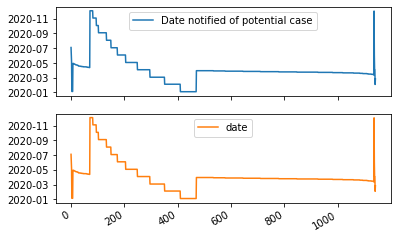

In [39]:
axes = df.plot.line(subplots=True)
type(axes)


In [154]:
def create_ts(df):
  ts = df
  ts = ts.drop(['Date notified of potential case', 'Sex', 'Age group', 'Overseas travel', 'Last country before return', 'Flight number', 'Flight departure date', 'Arrival date'], axis = 1)
  ts.set_index('date')
  #ts = ts.T
  #ts = ts.drop(['DHB'])
  #ts.columns = ts.loc['DHB']
  #ts = ts.drop('date')
  #ts=ts.fillna(0)
  #ts=ts.reindex(sorted(ts.columns), axis=0)
  #return (ts)
  print(ts)

In [155]:
time = create_ts(df)
#print(time)

                   DHB       date
0            Waitematā 2020-07-05
1              Waikato 2020-06-05
2            Waitematā 2020-05-05
3             Auckland 2020-01-05
4           Canterbury 2020-01-05
...                ...        ...
1137  Counties Manukau 2020-06-03
1138  Counties Manukau 2020-04-03
1139         Waitematā 2020-04-03
1140         Waitematā 2020-02-03
1141          Auckland 2020-02-26

[1142 rows x 2 columns]


Text(0.5, 1.0, 'Daily Total Confirmed - Major areas')

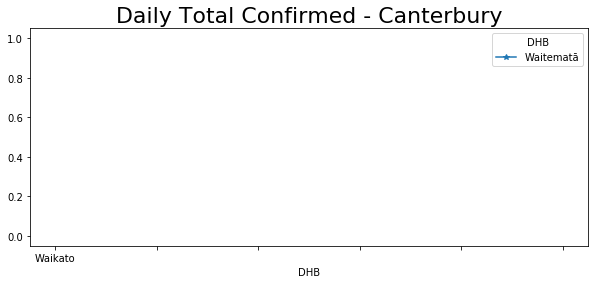

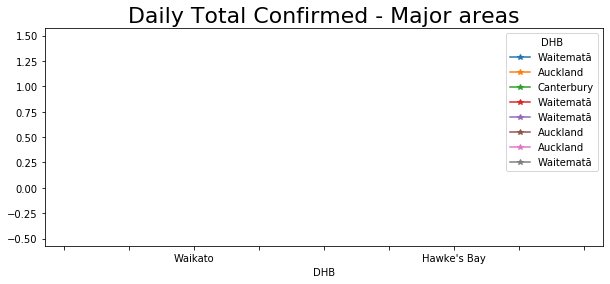

In [145]:
p = ts.reindex(ts.max().sort_values(ascending=False).index, axis=0)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Canterbury',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

